# Hopfield Networks

A Hopfield network is an early neural network model that was inspired by spin glass models. It has a single layer of fully connected neurons and is a very simple example of recurrent neural network (RNN) architecture.

Hopfield networks can be used for pattern recognition and storage. 
Thus, they used to be very popular in neuroscience as a means to model associative memory, a conceptualisation of the idea that "neurons that fire together, wire together".  

## Components of a Hopfield Network

It is made up of $N$ fully connected neurons, $\sigma_1, \sigma_2,\ldots, \sigma_N$ (where $N$ = length of the pattern we want to store), where each neuron can take values $\sigma_i=\pm 1$ (analogous to quantum spins) 

The network is specified through the weight matrix, $W$ where $W_{ij}$ captures how neurons $\sigma_i$ and $\sigma_j$ interact. We can encode and extract patterns $\hat{x_p}, p=1,2,\ldots,P$, where each pattern $\hat{x_p}$ is just a particular sequence of spins $\hat{x_p} = (\sigma_{1,p},\sigma_{2,p},\ldots,\sigma_{N,p})$.

There exist conditions on the number of patterns $P$ that can be efficiently encoded into a network with number of neurons $N$. As a general rule of thumb, we require $P/N<0.138$

## Steps of implementing a Hopfield Network

1. We first "fit" our model to our data - we encode the patterns we want to store, $\{\hat{x_p}:p=1,2,\ldots,P\}$ into our weight matrix, $W$. (Note that weight matrix is symmetric, and there are no self interactions, $W_{ii}=0\forall i$)

For a basic implementation, we can simply take:

$$ W_{ij} = \frac{1}{P}\sum_p\sigma_{i,p}\sigma_{j,p}$$

$$ \implies W = \frac{1}{P}\sum_p\ \hat{x_p}^T\hat{x_p}$$

(simplifies to averaging over outer products of each $\hat{x_p}$)  

2. Then, we can "transform" a noisy/partial pattern $\hat{x_{trial}}$ on our model, and thus retrieve a de-noised/complete pattern from the network. This is by performing an update rule on $\hat{x_{trial}}$ and hopefully, after multiple passes, it settles onto one of the stored patterns, $\hat{x_p}$.

Our simplified update rule (with no bias) is defined as:
$$ \sigma_{i,new} = sgn\left(\sum_j W_{ij}\sigma_{j,current} \right) $$
$$ \hat{x_{new}} = sgn\left( W\hat{x_{current}}\right) $$

where our signum function,

$$ sgn(\theta) = \begin{cases}
    +1 & \text{if } \theta > 0 \\ % & is your "\tab"-like command (it's a tab alignment character)
    -1 & \text{otherwise.}
\end{cases}$$

3. Finally, as an aside - inspired as this model is from the Sherrington-Kirkpatrick spin glass systems, we can define an energy associated with each pattern:
$$ E = -\frac{1}{2}\sum_{i,j}W_{ij}\sigma_i\sigma_j $$

It can be proven that at each update step defined above, the model will seek to decrease this energy. And that it ultimately will settle into an energy minima. (Knowing that spin glasses have complicated energy landscapes already indicate the possible failure modes of these Hopfield networks) 

$$ *** $$

We now implement this for the following scenario of digits from 0-9 being stored as a sequences of 0's and 1's of shape $(1 \times 90)$ using a $(10\times 9)$ neuron array.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

If I have sequences of 0's and 1's that represent the 9 digits in the following manner - 

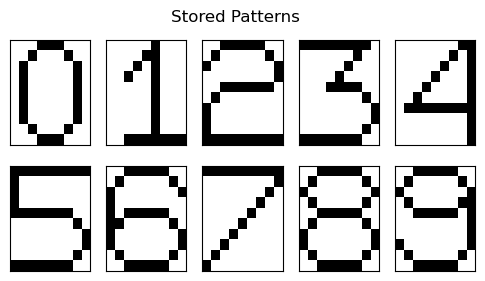

In [2]:
num_patterns = 10
patterns = np.zeros((num_patterns,90))

patterns[0] = [0,0,0,1,1,1,0,0,0,\
               0,0,1,0,0,0,1,0,0,\
               0,1,0,0,0,0,0,1,0,\
               0,1,0,0,0,0,0,1,0,\
               0,1,0,0,0,0,0,1,0,\
               0,1,0,0,0,0,0,1,0,\
               0,1,0,0,0,0,0,1,0,\
               0,1,0,0,0,0,0,1,0,\
               0,0,1,0,0,0,1,0,0,\
               0,0,0,1,1,1,0,0,0]

patterns[1] = [0,0,0,0,0,1,0,0,0,\
               0,0,0,0,1,1,0,0,0,\
               0,0,0,1,0,1,0,0,0,\
               0,0,1,0,0,1,0,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,1,1,1,1,1,1,1]

patterns[2] = [0,0,1,1,1,1,1,0,0,\
               0,1,0,0,0,0,0,1,0,\
               1,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,0,1,\
               0,0,1,1,1,1,1,1,0,\
               0,1,0,0,0,0,0,0,0,\
               1,0,0,0,0,0,0,0,0,\
               1,0,0,0,0,0,0,0,0,\
               1,0,0,0,0,0,0,0,0,\
               1,1,1,1,1,1,1,1,1]

patterns[3] = [1,1,1,1,1,1,1,1,0,\
               0,0,0,0,0,0,1,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,0,0,1,0,0,0,0,\
               0,0,0,1,1,1,1,0,0,\
               0,0,0,0,0,0,0,1,0,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,1,0,\
               1,1,1,1,1,1,1,0,0]

patterns[4] = [0,0,0,0,0,0,0,1,1,\
               0,0,0,0,0,0,1,0,1,\
               0,0,0,0,0,1,0,0,1,\
               0,0,0,0,1,0,0,0,1,\
               0,0,0,1,0,0,0,0,1,\
               0,0,1,0,0,0,0,0,1,\
               0,1,1,1,1,1,1,1,1,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,0,1]

patterns[5] = [1,1,1,1,1,1,1,1,1,\
               1,0,0,0,0,0,0,0,0,\
               1,0,0,0,0,0,0,0,0,\
               1,0,0,0,0,0,0,0,0,\
               1,1,1,1,1,1,1,0,0,\
               0,0,0,0,0,0,0,1,0,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,1,0,\
               1,1,1,1,1,1,1,0,0]

patterns[6] = [0,0,1,1,1,1,1,0,0,\
               0,1,0,0,0,0,0,1,0,\
               1,0,0,0,0,0,0,0,1,\
               1,0,0,0,0,0,0,0,0,\
               1,0,1,1,1,1,1,0,0,\
               1,1,0,0,0,0,0,1,0,\
               1,0,0,0,0,0,0,0,1,\
               1,0,0,0,0,0,0,0,1,\
               0,1,0,0,0,0,0,1,0,\
               0,0,1,1,1,1,1,0,0]

patterns[7] = [1,1,1,1,1,1,1,1,1,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,1,0,\
               0,0,0,0,0,0,1,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,0,0,1,0,0,0,0,\
               0,0,0,1,0,0,0,0,0,\
               0,0,1,0,0,0,0,0,0,\
               0,1,0,0,0,0,0,0,0,\
               1,0,0,0,0,0,0,0,0]

patterns[8] = [0,0,1,1,1,1,1,0,0,\
               0,1,0,0,0,0,0,1,0,\
               1,0,0,0,0,0,0,0,1,\
               0,1,0,0,0,0,0,1,0,\
               0,0,1,1,1,1,1,0,0,\
               0,1,0,0,0,0,0,1,0,\
               1,0,0,0,0,0,0,0,1,\
               1,0,0,0,0,0,0,0,1,\
               0,1,0,0,0,0,0,1,0,\
               0,0,1,1,1,1,1,0,0]

patterns[9] = [0,0,1,1,1,1,1,0,0,\
               0,1,0,0,0,0,0,1,0,\
               1,0,0,0,0,0,0,0,1,\
               0,1,0,0,0,0,0,1,1,\
               0,0,1,1,1,1,1,0,1,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,0,1,\
               1,0,0,0,0,0,0,0,1,\
               0,1,0,0,0,0,0,1,0,\
               0,0,1,1,1,1,1,0,0]

dim_pattern = (10,9)
fig, axs = plt.subplots(nrows = 2, ncols = num_patterns//2, figsize=(6,3))
fig.suptitle('Stored Patterns')
for i in range(num_patterns):
    xi, yi = i//(num_patterns//2), i % (num_patterns//2)
    axs[xi, yi].imshow(patterns[i].reshape(dim_pattern),aspect='auto',cmap = 'binary')
    axs[xi, yi].set_xticks([])
    axs[xi, yi].set_yticks([])
    

Thus, I have sequences of 0's and 1's of shape $1\times N$ (here, $N =90$) that can be reshaped into 2D arrays (of shape $dim_{pattern}=(10,9)$) that represent digits from 0-9.

These patterns can be stored in and retrieved from a Hopfield network containing $N$ fully connected neurons in the following manner:

In [3]:
class HopfieldNetwork:

    def __init__(self, stored_patterns, noise = 0.05):

        self.num_patterns = stored_patterns.shape[0]
        self.N = stored_patterns.shape[1] # no of neurons = size of a single pattern

        self.stored_patterns = self.bool_to_spins(stored_patterns)
        self.noise = noise

        self.W = self.W_matrix()
        self.energies = []
        self.pattern_history = []

    def bool_to_spins(self, patterns):
        return np.array([(-np.ones_like(patterns[i,:]))**(patterns[i,:]+1) for i in range(patterns.shape[0])])
        
    def spins_to_bool(self, patterns):
        return np.array([(pat+1)//2 for pat in patterns])
    
    def W_matrix(self, e = 1):
        W = np.zeros((self.N, self.N))
        for pattern in self.stored_patterns:
            W += e*np.outer(pattern,pattern)

        W[np.diag_indices(self.N)] = 0
        W /= self.num_patterns
        return W
    
    def energy(self, current_pats):
        cp_energy = np.zeros(current_pats.shape[0])

        for k, pattern in enumerate(current_pats):
            cp_energy[k] = -0.5*np.sum(np.multiply(self.W, np.outer(pattern,pattern)))
        return cp_energy

    def generate_test(self,noise=None):
        if noise is None:
            noise = self.noise

        test_patterns = []
        for pat in self.stored_patterns:
            test_patterns.append(np.array([-1*pat[i] if np.random.random()<noise
                                            else pat[i] for i in range(pat.size)]))
        return np.array(test_patterns)
    
    def run(self, num_cycles=5, test_pats=None, noise = None):
        if test_pats is None:
            test_pats = self.generate_test(noise) # generates test_patterns in [-1,1]
        else:
            test_pats = self.bool_to_spins(test_pats)

        current_pats = np.copy(test_pats)
        self.pattern_history.append(current_pats)
        self.energies.append(self.energy(current_pats))

        for _ in range(num_cycles):
                new_patterns = np.sign(np.matmul(current_pats,(self.W).T))

                self.pattern_history.append(new_patterns)
                self.energies.append(self.energy(new_patterns))

                current_pats = np.copy(new_patterns)

        self.energies = np.array(self.energies)

In [4]:
# instantiate the model
model = HopfieldNetwork(patterns)

In [5]:
model.run()

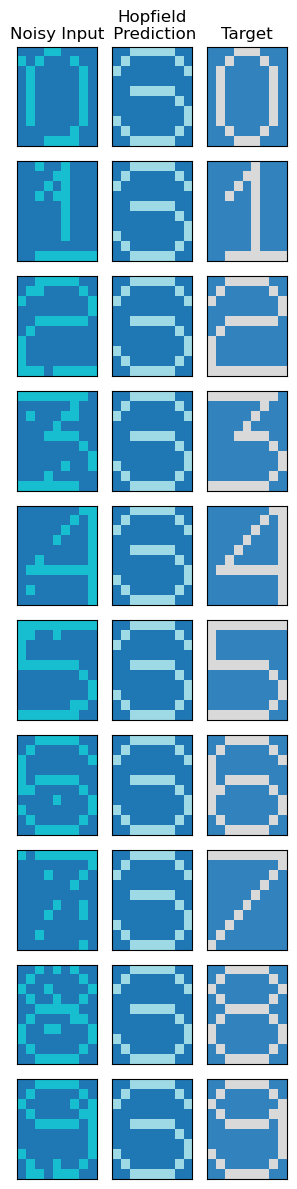

In [6]:
fig, axs = plt.subplots(nrows = model.num_patterns, ncols = 3, figsize = (3,12))
for i in range(model.num_patterns):
    axs[i,0].imshow(model.pattern_history[0][i].reshape(10,9),aspect="auto",cmap='tab10')
    axs[i,1].imshow(model.pattern_history[-1][i].reshape(10,9),aspect="auto",cmap='tab20')
    axs[i,2].imshow(model.stored_patterns[i].reshape(10,9),aspect="auto",cmap='tab20c')

    axs[i,0].set_xticks([]); axs[i,0].set_yticks([])
    axs[i,1].set_xticks([]); axs[i,1].set_yticks([])
    axs[i,2].set_xticks([]); axs[i,2].set_yticks([])

axs[0,0].set_title('Noisy Input')
axs[0,1].set_title('Hopfield\n Prediction')
axs[0,2].set_title('Target')

fig.tight_layout()

We see that unfortunately, we haven't been succesful in extracting de-noised patterns using the Hopfield network. We have already stumbled across the major pitfall of these methods - existence of spurious states. 

Spurious states are non-stored patterns that are attractors of the network dynamics. If we start near one of these spurious states the dynamics will converge towards them, which is obviously not ideal. These arise due to the complex energy landscape of the Sherrington-Kirkpatrick spin-glass. This is also reflected in the energy plots of each state, over time:

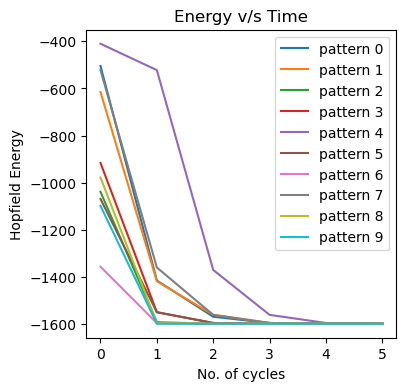

In [11]:
fig, ax = plt.subplots(1,figsize=(4,4))
for i in range(num_patterns):
    ax.plot(model.energies[:,i],label=f'pattern {i}')
ax.legend()
ax.set_title('Energy v/s Time'); ax.set_xlabel('No. of cycles'); ax.set_ylabel('Hopfield Energy')


We are slightly more successful when we take a smaller number of patterns and we try to choose more distinct digits - e.g. 0,1,3,4,7.

## Smaller Subset of Stored Patterns

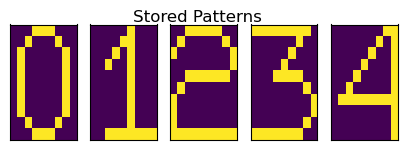

In [19]:
num_patterns = 5
sd_patterns = np.zeros((num_patterns,90))

sd_patterns[0] = [0,0,0,1,1,1,0,0,0,\
               0,0,1,0,0,0,1,0,0,\
               0,1,0,0,0,0,0,1,0,\
               0,1,0,0,0,0,0,1,0,\
               0,1,0,0,0,0,0,1,0,\
               0,1,0,0,0,0,0,1,0,\
               0,1,0,0,0,0,0,1,0,\
               0,1,0,0,0,0,0,1,0,\
               0,0,1,0,0,0,1,0,0,\
               0,0,0,1,1,1,0,0,0]

sd_patterns[1] = [0,0,0,0,0,1,0,0,0,\
               0,0,0,0,1,1,0,0,0,\
               0,0,0,1,0,1,0,0,0,\
               0,0,1,0,0,1,0,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,1,1,1,1,1,1,1]

sd_patterns[2] = [0,0,1,1,1,1,1,0,0,\
               0,1,0,0,0,0,0,1,0,\
               1,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,0,1,\
               0,0,1,1,1,1,1,1,0,\
               0,1,0,0,0,0,0,0,0,\
               1,0,0,0,0,0,0,0,0,\
               1,0,0,0,0,0,0,0,0,\
               1,0,0,0,0,0,0,0,0,\
               1,1,1,1,1,1,1,1,1]

sd_patterns[3] = [1,1,1,1,1,1,1,1,0,\
               0,0,0,0,0,0,1,0,0,\
               0,0,0,0,0,1,0,0,0,\
               0,0,0,0,1,0,0,0,0,\
               0,0,0,1,1,1,1,0,0,\
               0,0,0,0,0,0,0,1,0,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,1,0,\
               1,1,1,1,1,1,1,0,0]

sd_patterns[4] = [0,0,0,0,0,0,0,1,1,\
               0,0,0,0,0,0,1,0,1,\
               0,0,0,0,0,1,0,0,1,\
               0,0,0,0,1,0,0,0,1,\
               0,0,0,1,0,0,0,0,1,\
               0,0,1,0,0,0,0,0,1,\
               0,1,1,1,1,1,1,1,1,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,0,1,\
               0,0,0,0,0,0,0,0,1]

dim_pattern = (10,9)
fig, axs = plt.subplots(nrows = 1, ncols = num_patterns, figsize=(5,1.5))
fig.suptitle('Stored Patterns\n')
for i in range(num_patterns):
    axs[i].imshow(patterns[i].reshape(dim_pattern),aspect='auto')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

In [25]:
model_sd = HopfieldNetwork(sd_patterns)
model_sd.run()

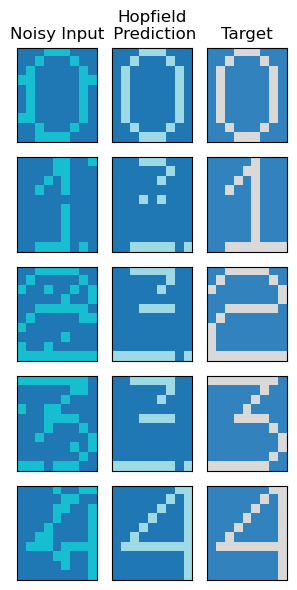

In [26]:
fig, axs = plt.subplots(nrows = model_sd.num_patterns, ncols = 3, figsize = (3,6))
for i in range(model_sd.num_patterns):
    axs[i,0].imshow(model_sd.pattern_history[0][i].reshape(10,9),aspect="auto",cmap='tab10')
    axs[i,1].imshow(model_sd.pattern_history[-1][i].reshape(10,9),aspect="auto",cmap='tab20')
    axs[i,2].imshow(model_sd.stored_patterns[i].reshape(10,9),aspect="auto",cmap='tab20c')

    axs[i,0].set_xticks([]); axs[i,0].set_yticks([])
    axs[i,1].set_xticks([]); axs[i,1].set_yticks([])
    axs[i,2].set_xticks([]); axs[i,2].set_yticks([])

axs[0,0].set_title('Noisy Input')
axs[0,1].set_title('Hopfield\n Prediction')
axs[0,2].set_title('Target')

fig.tight_layout()

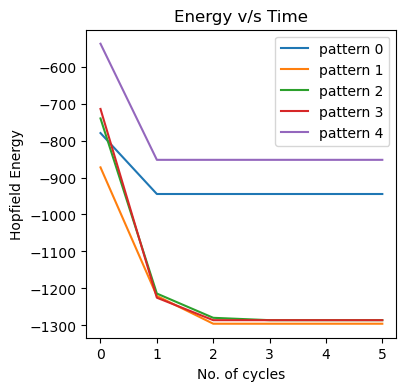

In [27]:
fig, ax = plt.subplots(1,figsize=(4,4))
for i in range(num_patterns):
    ax.plot(model_sd.energies[:,i],label=f'pattern {i}')
ax.legend()
ax.set_title('Energy v/s Time'); ax.set_xlabel('No. of cycles'); ax.set_ylabel('Hopfield Energy');

Therefore, we could extract denoised states for 0 and 4 when we took a smaller number of patterns. We could thus demonstrate some utility of a basic Hopfield network. 

### References
* [Spin Glass Model Applications and Extensions](https://lewiscoleblog.com/spin-glass-models-5)